In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
target = iris.target
data = pd.DataFrame(iris.data,columns=iris.feature_names)


data.columns = ['sepal_length','sepal_width','petal_length','petal_width']

In [3]:
import random
random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=123)


In [4]:
Example = data.copy()
Example['Label'] = target

In [5]:
X_train['label'] = y_train
train_df = X_train

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
X_test['label'] = y_test
test_df = X_test

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
def check_purity(data):
    
    '''
    looks if there is only one class
    '''
    
    label = data[:,-1]
    #returns array of our unique labels
    unique_classes = np.unique(label)
    
    if len(unique_classes)==1:
        return True
    else:
        return False

In [8]:
check_purity(train_df[train_df['petal_length']>7].values)

False

## Classify

In [9]:
def classify_data(data):
    
    #outputs the majority class of the dataset
    
    label = data[:,-1]
    unique_classes, counts_of_unique_classes = np.unique(label,return_counts=True)

    index = counts_of_unique_classes.argmax()

    classification = unique_classes[index]

    
    
    
    
    return classification




## Potential Splits

In [10]:
def get_potential_splits(data):
    potential_splits = {}
    _, n_columns = data.shape

    for column_index in range(n_columns-1):
        
        values = data[:, column_index]
        univalues = np.unique(values)
        
        potential_splits[column_index] = univalues
        
    
    return potential_splits

In [11]:
potential_splits = get_potential_splits(train_df.values)

## Split Data

In [12]:
def split_data(data, split_column, split_value):
    
    
    
    split_column_values = data[:, split_column]
    
    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == 'continuous':
    
        data_below = data[split_column_values <=split_value]
        data_above = data[split_column_values >split_value]

    else:
        data_below = data[split_column_values ==split_value]
        data_above = data[split_column_values !=split_value]
        
    
    return data_below, data_above

### Lowest Overall Entropy


In [16]:
def calculate_entropy(data):
    label_column = data[:,-1]
    ##determine probabilities of the classes

    #count up the number of samples in each label
    _,counts = np.unique(label_column,return_counts=True)
    
    #convert the count to the probability of a value falling into a certain class label
    probabilities = counts/counts.sum()

    
    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy

In [17]:
def calculate_overall_entropy(data_below,data_above):
    
    
    n_data_points = len(data_below) + len(data_above)


    #samples below the line
    p_data_below = len(data_below)/n_data_points

    #samples above the line
    p_data_above = len(data_above)/n_data_points

    overall_entropy = (p_data_below * calculate_entropy(data_below)

                      +p_data_above * calculate_entropy(data_above))

    
    
    
    return overall_entropy
    

## Determine the splits that results in the lowest overall entropy

In [34]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 999


    for column_index in potential_splits:
        
        #print(COLUMN_HEADERS[column_index], "-", len(np.unique(data[:, column_index])))
        
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data,split_column=column_index,split_value=value)

            current_overall_entropy = calculate_overall_entropy(data_below,data_above)

            if current_overall_entropy <= overall_entropy:

                overall_entropy=current_overall_entropy


                best_split_column = column_index

                best_split_value = value
                
                
    return best_split_column,best_split_value

In [35]:
potential_splits = get_potential_splits(Example.values)

In [36]:
determine_best_split(Example.values,potential_splits)

(3, 0.6)

In [37]:
def determine_type_of_feature(data):
    feature_types = []
    n_unique_values_threshold = 15
    for column in data.columns:
        unique_vals = data[column].unique()
        example_value = unique_vals[0]
        
        if type(example_value) == str or (len(unique_vals)<= n_unique_values_threshold):
            feature_types.append("categorical")
        else:
            feature_types.append("continuous")
    return feature_types

In [38]:
FEATURE_TYPES

['continuous', 'continuous', 'continuous', 'continuous', 'categorical']

## Decision Tree Algorithm

sub_tree = {question: [yes_answer, no_answer]}

## ALGORITHM

In [23]:
def DecisionTreeAlgo(df, counter=0, min_samples=2, max_depth=5):
    
    """
    minimum sample size: the minimum number of sampels a node must contain in
    order to consider splitting.
    """
    
    
    # data preparations
    
    if counter == 0:
        
        global COLUMN_HEADERS, FEATURE_TYPES
        
        
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        
        data = df.values
    else:
        
        data = df
        
        
    # base case for recusive function
    if (check_purity(data)) or (len(data)< min_samples) or (counter==max_depth):
        #return our prediction
        classification = classify_data(data)
        return classification
    
    
    #recursive section
    
    else:
        
        counter += 1
        
        
        # run helper functions
        
        potential_splits = get_potential_splits(data)
  
            
        #find lowest overall entropy
        
        split_column, split_value = determine_best_split(data, potential_splits)
        
        
        data_below, data_above = split_data(data, split_column, split_value)
        
        
        #check for empty data
        if len(data_below) == 0 or len(data_above)==0:
            classification = classify_data(data)
            return classification
        
        
        #instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == 'continuous':
            question  = "{} <= {}".format(feature_name,split_value)
            
        else:
            
            question  = "{} == {}".format(feature_name,split_value)

        
        sub_tree = {question: []}
        
        
        #find answers
        
        yes_answer = DecisionTreeAlgo(data_below, counter, min_samples,max_depth)
        
        
        no_answer = DecisionTreeAlgo(data_above, counter, min_samples,max_depth)
        
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            
        
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        
        return sub_tree
        
    

In [24]:
tree = DecisionTreeAlgo(train_df,min_samples=5,max_depth=3)

## Classify

In [25]:
def predict(example, tree):
    question = list(tree.keys())[0]

    feature_name, comparison, value = question.split()

    # ask question
    
    if comparison == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0] 
        else:
            answer = tree[question][1] 
            
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0] 
        else:
            answer = tree[question][1]
        
        

    #base case    
    if not isinstance(answer, dict):
        return(answer)
    else:

        residual_tree = answer
        return predict(example,residual_tree) 

In [26]:
predict(example,tree)

NameError: name 'example' is not defined

## Accuracy

In [27]:
def calculate_accuracy(df,tree):
    
    df['classification'] = df.apply(predict, axis=1, args=(tree,))
    
    df['classification_correct'] = df.classification == df.label
    
    
    accuracy = df.classification_correct.mean()
    return accuracy
    

In [28]:
calculate_accuracy(test_df,tree)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0.94

In [40]:
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Text(0.5, 1, 'Petal Leaves')

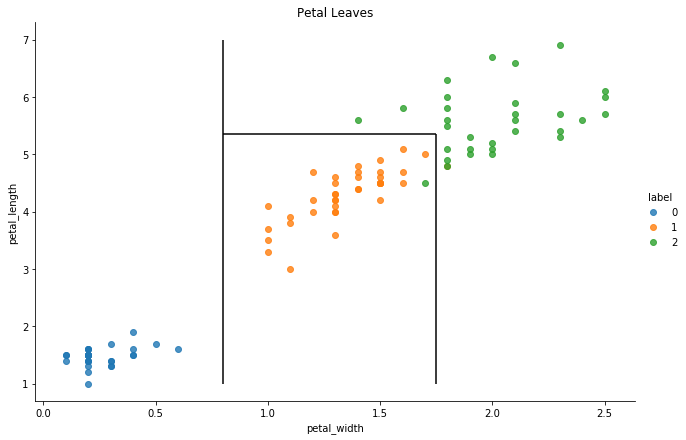

In [49]:

import seaborn as sns
import matplotlib.pyplot as plt
split_column2 = 3
split_value2 = 1.75
split_value = 0.8
split_value3 = 5.35
#data_below, data_above = split_data(Example.values,split_column,split_value)
data_belowsplit2, data_abovesplit2 = split_data(data.values,split_column2,split_value2)



plotting_df = pd.DataFrame(data_belowsplit2,columns=data.columns)

sns.lmplot(data=train_df,x='petal_width',y='petal_length',fit_reg=False,size=6,aspect=1.5,
          hue='label')
plt.vlines(x=split_value2,ymin=1,ymax=split_value3)

plt.vlines(x=split_value,ymin=1,ymax=7)
plt.hlines(y=split_value3,xmin=split_value,xmax=split_value2)

plt.title('Petal Leaves')

In [326]:
train = pd.read_csv('/Users/Matt/Documents/Intro To Stat Learning/data/titanic (1)/train.csv')


In [327]:

label = train['Survived']
train = train.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)

In [328]:
median_Age = train['Age'].median()

In [329]:
train = train.fillna({"Age":median_Age,"Embarked":'S'})


X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.33, random_state=123)


In [330]:
train_df = X_train
train_df['label'] = y_train


test_df = X_test
test_df['label'] = y_test

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Decision With Categories Tree Algo

In [333]:
from pprint import pprint
tree = DecisionTreeAlgo(train_df,min_samples=5,max_depth=5)
pprint(tree, width=50,depth=10)


calculate_accuracy(test_df,tree)

{'Sex == male': [{'Age <= 12.0': [{'Fare <= 26.0': [1,
                                                    {'Pclass == 3': [0,
                                                                     1]}]},
                                  {'Pclass == 1': [{'Fare <= 26.0': [0,
                                                                     {'Age <= 38.0': [1,
                                                                                      0]}]},
                                                   0]}]},
                 {'Pclass == 3': [{'Fare <= 24.15': [{'Age <= 36.0': [{'Fare <= 8.0292': [1,
                                                                                          0]},
                                                                      0]},
                                                     {'Age <= 5.0': [1,
                                                                     0]}]},
                                  {'Fare <= 26.0': [{'Age <= 36.0': [1,
  

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0.8